In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from physicochem_properties_for_pca import *

## Drug bank

In [2]:
from rdkit.Chem import PandasTools as rpd

fn = '/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures.sdf'

drugbank_bg = rpd.LoadSDF(fn, embedProps=True, molColName=None, smilesName='smiles')
drugbank_bg


RDKit ERROR: [11:21:07] Explicit valence for atom # 28 N, 4, is greater than permitted
RDKit ERROR: [11:21:07] ERROR: Could not sanitize molecule ending on line 327321
RDKit WARNING: [11:21:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:21:07] WARNING: not removing hydrogen atom without neighbors


,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUGBANK_ID,SECONDARY_ACCESSION_NUMBERS,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,smiles,SALTS
0,DB00006,drugbank,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,OIRCOABEOLEUMC-GEJPAHFPSA-N,C98H138N24O33,2180.2853,2178.985813062,37,293,...,DB00006,BTD00076; EXPT03302; BIOD00076; DB02351,approved; investigational,Bivalirudin,Bivalirudin; Bivalirudina; Bivalirudinum,Angiomax; Angiomax RTU; Angiox; Bivalirudin; B...,Angiox; Hirulog,,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,NaN
1,DB00007,drugbank,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,GFIJNRVAKGFPGQ-LIJARHBVSA-N,C59H84N16O12,1209.3983,1208.645462232,16,171,...,DB00007,BTD00009; BIOD00009,approved; investigational,Leuprolide,Leuprorelin; Leuprorelina; Leuproreline; Leupr...,Camcevi; Eligard; Fensolvi; Leuprolide Acetate...,Camcevi; Leuplin; LeuProMaxx; Memryte; Prostap...,,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...,Leuprolide acetate; Leuprolide mesylate
2,DB00014,drugbank,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,BLCLNMBMMGCOAS-URPVMXJPSA-N,C59H84N18O14,1269.4105,1268.641439486,18,175,...,DB00014,BTD00113; BIOD00113,approved,Goserelin,Goserelin; Goserelina,Zoladex; Zoladex LA,NaN,[NO NAME],CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,Goserelin acetate
3,DB00027,drugbank,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,NDAYQJDHGXTBJL-MWWSRJDJSA-N,C96H135N19O16,1811.253,1810.033419343,16,266,...,DB00027,BTD00036; BIOD00036,approved,Gramicidin D,Bacillus brevis gramicidin D; Gramicidin; Gram...,Antibiotic Cream; Antibiotic Cream Plus Pain R...,Sofradex,,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,NaN
4,DB00035,drugbank,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,InChI=1S/C46H64N14O12S2/c47-35(62)15-14-29-40(...,NFLWUMRGJYTJIN-PNIOQBSNSA-N,C46H64N14O12S2,1069.22,1068.426955905,15,138,...,DB00035,BTD00112; BTD00061; BIOD00112; BIOD00061,approved,Desmopressin,1-(3-mercaptopropionic acid)-8-D-arginine-vaso...,Apo-desmopressin; Bipazen; DDAVP Rhinal Tube; ...,Adiuretin; DesmoMelt,,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...,Desmopressin acetate; Desmopressin acetate anh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,DB16965,drugbank,CCNCC1=NC2=C(C(Cl)=CC(Cl)=C2O)C(=O)N1C,InChI=1S/C12H13Cl2N3O2/c1-3-15-5-8-16-10-9(12(...,LQNHWKHRUWSYBK-UHFFFAOYSA-N,C12H13Cl2N3O2,302.16,301.0384821,4,32,...,DB16965,NaN,approved; investigational,PBT-434,"5,7-dichloro-2-((ethylamino)methyl)-8-hydroxy-...",NaN,NaN,,CCNCc1nc2c(O)c(Cl)cc(Cl)c2c(=O)n1C,PBT-434 Mesylate
2584,DB17083,drugbank,COC1=C(COC2=C(OC)C=C(F)C(=C2)N2C(=O)NC3=CSC(C(...,InChI=1S/C22H15F3N2O7S/c1-32-14-4-3-10(23)18(2...,BMAAMIIYNNPHAB-UHFFFAOYSA-N,C22H15F3N2O7S,508.42,508.055206494,7,50,...,DB17083,NaN,approved,Linzagolix,"3-(5-((2,3-difluoro-6-methoxyphenyl)methoxy)-2...",KLH-2109 Choline; Yselty,NaN,,COc1cc(F)c(-n2c(=O)[nH]c3csc(C(=O)O)c3c2=O)cc1...,Linzagolix choline
2585,DB17084,drugbank,[Gd+3].OCC(O)CNC(=O)CCC(N1CCN(CC2=CC=CC(CN(CC1...,InChI=1S/C35H57N7O15.Gd/c43-19-24(46)14-36-30(...,GNRQMLROZPOLDG-UHFFFAOYSA-K,C35H54GdN7O15,970.1,970.2919,19,112,...,DB17084,NaN,approved,Gadopiclenol,"(.alpha.3,.alpha.6,.alpha.9-tris(3-((2,3-dihyd...",Elucirem; Vueway,Elucirem,,O=C(CCC(C(=O)[O-])N1CCN(C(CCC(=O)NCC(O)CO)C(=O...,NaN
2586,DB17308,drugbank,CCCCCCCCCCCCN1CCCCCC1=O,InChI=1S/C18H35NO/c1-2-3-4-5-6-7-8-9-10-13-16-...,AXTGDCSMTYGJND-UHFFFAOYSA-N,C18H35NO,281.484,281.271864751,1,55,...,DB17308,NaN,approved,Laurocapram,1-dodecylazacycloheptan-2-one; 1-dodecylhexahy...,NaN,NaN,,CCCCCCCCCCCCN1CCCCCC1=O,NaN


In [3]:
drugbank_bg.dropna(subset = ['SMILES'],inplace=True)

In [4]:
len(drugbank_bg)

2587

In [5]:
drugbank_bg.columns

Index(['DATABASE_ID', 'DATABASE_NAME', 'SMILES', 'INCHI_IDENTIFIER',
       'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS',
       'JCHEM_ACCEPTOR_COUNT', 'JCHEM_ATOM_COUNT',
       'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
       'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY',
       'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER',
       'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS',
       'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NEUTRAL_CHARGE', 'JCHEM_NUMBER_OF_RINGS',
       'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC',
       'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA',
       'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT',
       'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC',
       'JCHEM_VEBER_RULE', 'DRUGBANK_ID', 'SECONDARY_ACCESSION_NUMBERS',
       'DRUG_GROUPS', 'GENERIC_NAME', 'SYNONYMS', 'PRODUCTS',
       'INTERNATIONAL_BRANDS', 'ID', 'smiles', 'SALTS'],
      dt

In [6]:
import rdkit
print(rdkit.__version__)
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import pandas as pd
from rdkit.Chem import rdmolfiles
from rdkit.Chem.rdmolfiles import SmilesMolSupplier
from rdkit.Chem import SDMolSupplier
from rdkit.Chem import AllChem, PandasTools
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams
from rdkit.Chem import SaltRemover
from rdkit import RDLogger
import os
import subprocess
import matplotlib.pyplot as plt

import chembl_structure_pipeline
print(chembl_structure_pipeline.__version__)
from chembl_structure_pipeline import standardizer
import sys
sys.path.append('/home/sliu/cyp_related_coding/')
#from same folder import src
from src import MoleculePreprocessor
from src.MoleculePreprocessor import MoleculePreprocessor
from src.MoleculePreprocessorExtended import MoleculePreprocessorExtended

2021.03.2
1.0.0


<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [7]:
from chembl_structure_pipeline.standardizer import standardize_mol

In [8]:
mols = []
for mol in drugbank_bg.SMILES:
    rdkit_mol = Chem.MolFromSmiles(mol)
    mols.append(rdkit_mol)
mols
df_to_wash = pd.DataFrame(mols, columns=['molecules'])
print(len(df_to_wash))
df_to_wash.dropna(subset = ['molecules'],inplace=True)
print(len(df_to_wash))

RDKit ERROR: [11:21:07] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
RDKit ERROR: [11:21:07] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:21:07] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:21:08] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:21:08] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
RDKit ERROR: [11:21:08] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
RDKit ERROR: [11:21:08] Explicit valence for atom # 0 N, 4, is greater than permitted


2587
2582


RDKit WARNING: [11:21:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:21:08] WARNING: not removing hydrogen atom without neighbors


RDKit INFO: [11:21:07] Initializing Normalizer
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalize

RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKit INFO: [11:21:08] Running Uncharger
RDKit INFO: [11:21:08] Running Normalizer
RDKi

,molecules
0,
1,
2,
3,
4,

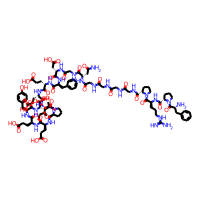
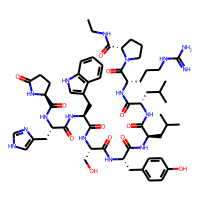
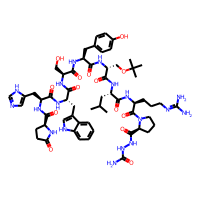
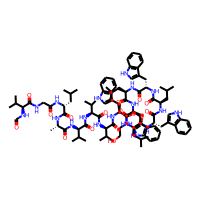
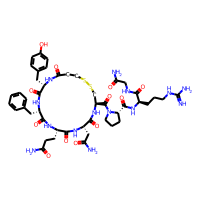

In [9]:
washed = []
for mol in df_to_wash.molecules:
    a = standardizer.standardize_mol(mol)
    washed.append(a)
washed
df_washed = pd.DataFrame(washed, columns=['molecules'])
df_washed.head(5)

In [10]:
moleculesProcessed = MoleculePreprocessorExtended.init_with_smiles(list(drugbank_bg.SMILES))


RDKit ERROR: [11:21:11] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:21:11] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:21:11] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [11:21:11] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
RDKit ERROR: [11:21:11] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
RDKit ERROR: [11:21:11] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit WARNING: [11:21:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:21:11] WARNING: not removi

In [11]:
moleculesProcessed.csp_wash()
preprocessedSmilesDict = moleculesProcessed.get_rawsmiles_smiles_dict()

RDKit WARNING: [11:21:26] Tautomer enumeration stopped at 282 tautomers: max transforms reached
RDKit WARNING: [11:21:27] Tautomer enumeration stopped at 344 tautomers: max transforms reached
RDKit WARNING: [11:21:27] Tautomer enumeration stopped at 707 tautomers: max transforms reached
RDKit WARNING: [11:21:28] Tautomer enumeration stopped at 331 tautomers: max transforms reached
RDKit WARNING: [11:21:29] Tautomer enumeration stopped at 294 tautomers: max transforms reached
RDKit WARNING: [11:21:29] Tautomer enumeration stopped at 140 tautomers: max transforms reached
RDKit WARNING: [11:21:29] Tautomer enumeration stopped at 150 tautomers: max transforms reached
RDKit WARNING: [11:21:30] Tautomer enumeration stopped at 359 tautomers: max transforms reached
RDKit WARNING: [11:21:31] Tautomer enumeration stopped at 390 tautomers: max transforms reached
RDKit WARNING: [11:21:31] Tautomer enumeration stopped at 140 tautomers: max transforms reached
RDKit WARNING: [11:21:32] Tautomer enume

In [12]:
preprocessedSmiles_df = pd.DataFrame(list(preprocessedSmilesDict.items()),
                       columns=['rawSmiles','preprocessedSmiles'])

In [13]:
preprocessed_df = pd.merge(drugbank_bg, preprocessedSmiles_df, 
                           left_on='SMILES', right_on='rawSmiles')

In [14]:
preprocessed_df.columns

Index(['DATABASE_ID', 'DATABASE_NAME', 'SMILES', 'INCHI_IDENTIFIER',
       'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS',
       'JCHEM_ACCEPTOR_COUNT', 'JCHEM_ATOM_COUNT',
       'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
       'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY',
       'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER',
       'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS',
       'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NEUTRAL_CHARGE', 'JCHEM_NUMBER_OF_RINGS',
       'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC',
       'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA',
       'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT',
       'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC',
       'JCHEM_VEBER_RULE', 'DRUGBANK_ID', 'SECONDARY_ACCESSION_NUMBERS',
       'DRUG_GROUPS', 'GENERIC_NAME', 'SYNONYMS', 'PRODUCTS',
       'INTERNATIONAL_BRANDS', 'ID', 'smiles', 'SALTS', 'rawSmile

In [15]:
preprocessed_df[['SMILES', 'smiles', 'rawSmiles', 'preprocessedSmiles', 'MOLECULAR_WEIGHT']].head(5)

,SMILES,smiles,rawSmiles,preprocessedSmiles,MOLECULAR_WEIGHT
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,,2180.2853
1,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,,1209.3983
2,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,,1269.4105
3,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,,1811.253
4,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,,1069.22


In [16]:
preprocessed_df.dropna(subset=['preprocessedSmiles'],inplace=True) 

In [17]:
preprocessed_df = preprocessed_df[preprocessed_df['preprocessedSmiles']!='']

In [18]:
len(preprocessed_df)

1675

In [19]:
save_path = '/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures_preprocessed.csv'
preprocessed_df.to_csv(save_path, index=False)

## unify column names

In [20]:
#print(pubchem2.PUBCHEM_ACTIVITY_OUTCOME.value_counts())

In [21]:
#pubchem_active = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/pubchem_active.csv')
#pubchem_inactive = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/pubchem_inactive.csv')
#chembl_active = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/chembl_active.csv')
#chembl_inactive = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/chembl_inactive.csv')


In [22]:
pubchem_active = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/clean_code/dataset_prep/pubchem_preprocessed_active.csv')
pubchem_inactive = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/clean_code/dataset_prep/pubchem_preprocessed_inactive.csv')
chembl_active = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/clean_code/dataset_prep/chembl_preprocessed_active.csv')
chembl_inactive = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/clean_code/dataset_prep/chembl_preprocessed_inactive.csv')
tested = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/tested_smiles.csv')
drugbank = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures_preprocessed.csv') 

In [23]:
chembl_active

,preprocessedSmiles,Molecule ChEMBL ID,activity_classification
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,active
1,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,active
2,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,active
3,O=[N+]([O-])c1ccc(C(c2cc3ccc(O)cc3o2)n2cncn2)cc1,CHEMBL202231,active
4,COc1ccc2cc(C(O)(c3ccc(Cl)cc3)c3cccnc3)oc2c1,CHEMBL202612,active
...,...,...,...
754,CC(=C(c1ccc(O)cc1)c1ccc(O)cc1)c1c[nH]cn1,CHEMBL5082681,active
755,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,active
756,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,active
757,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,active


In [24]:
chembl_inactive

,preprocessedSmiles,Molecule ChEMBL ID,activity_classification
0,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,inactive
1,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,inactive
2,COc1ccc(C(=NNc2cnnc(Cl)c2Cl)c2ccccc2)cc1,CHEMBL497614,inactive
3,COc1ccc2c(=O)c(-c3ccccc3)c(-n3cncn3)oc2c1,CHEMBL190099,inactive
4,COc1ccc2c(=O)c(-c3ccccc3)c(SCc3cccnc3)oc2c1,CHEMBL185819,inactive
...,...,...,...
621,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,CHEMBL5092843,inactive
622,CC12CCC3C4=C(CCCC4)CC(=O)C3C1CCC2=O,CHEMBL71082,inactive
623,COCOc1ccc2c(c1)OC(c1ccc(OCOC)c(CC=C(C)C)c1)CC2=O,CHEMBL229945,inactive
624,COc1ccc2c(c1)OC(c1ccc(O)c(CC=C(C)C)c1)CC2=O,CHEMBL388374,inactive


In [25]:
pubchem_active

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active
2,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active
3,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active
4,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active
...,...,...,...
200,Cc1oc2c(NC(=O)c3c(Cl)cccc3Cl)cccc2c1C(C)(C)O,144213666.0,Active
201,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,144213678.0,Active
202,Cc1[nH]nc2c1N=C(c1ccccc1Cl)c1cc([N+](=O)[O-])c...,144213825.0,Active
203,CC(C)CC1C(=O)N2CCCC2C2(O)OC(NC(=O)C3=CC4c5cccc...,144213902.0,Active


In [26]:
pubchem_inactive

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME
0,CC12CCC3c4ccc(O)cc4CCC3C1CCC2OC(=O)CCC1CCCC1,144203554.0,Inactive
1,CC1(C)C2CCC1(C)C(OC(=O)CSC#N)C2,144203555.0,Inactive
2,O=S1(=O)OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21,144203563.0,Inactive
3,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O[PH](=O)(=O)O,144203569.0,Inactive
4,COC(=O)C1C(O)CCC2CN3CCc4c([nH]c5ccccc45)C3CC21,144203570.0,Inactive
...,...,...,...
2223,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive
2224,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive
2225,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive
2226,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive


In [27]:
tested.columns

Index(['preprocessedSmiles', 'MOLPORTID'], dtype='object')

In [28]:
drugbank.columns

Index(['DATABASE_ID', 'DATABASE_NAME', 'SMILES', 'INCHI_IDENTIFIER',
       'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS',
       'JCHEM_ACCEPTOR_COUNT', 'JCHEM_ATOM_COUNT',
       'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
       'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY',
       'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER',
       'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS',
       'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NEUTRAL_CHARGE', 'JCHEM_NUMBER_OF_RINGS',
       'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC',
       'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA',
       'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT',
       'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC',
       'JCHEM_VEBER_RULE', 'DRUGBANK_ID', 'SECONDARY_ACCESSION_NUMBERS',
       'DRUG_GROUPS', 'GENERIC_NAME', 'SYNONYMS', 'PRODUCTS',
       'INTERNATIONAL_BRANDS', 'ID', 'smiles', 'SALTS', 'rawSmile

In [29]:
chembl_active = chembl_active[['preprocessedSmiles']]
chembl_inactive = chembl_inactive[['preprocessedSmiles']]
pubchem_active = pubchem_active[['preprocessedSmiles']]
pubchem_inactive = pubchem_inactive[['preprocessedSmiles']]
tested = tested[['preprocessedSmiles']]
drugbank = drugbank[['preprocessedSmiles']]

In [30]:
chembl_active['label'] = 'ChEMBL (Active)'
chembl_inactive['label'] = 'ChEMBL (Inactive)'
pubchem_active['label'] = 'PubChem BioAssay (Active)'
pubchem_inactive['label'] = 'PubChem BioAssay (Inactive)'
tested['label'] = 'Tested compounds'
drugbank['label'] = 'DrugBank'


<ipython-input-30-0cbd313f1fef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_active['label'] = 'ChEMBL (Active)'
<ipython-input-30-0cbd313f1fef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_inactive['label'] = 'ChEMBL (Inactive)'
<ipython-input-30-0cbd313f1fef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

## calculate descriptors

In [31]:
get_physicochemical_properties(chembl_active,'preprocessedSmiles')
get_further_physicochemical_properties(chembl_active)
get_physicochemical_properties(chembl_inactive,'preprocessedSmiles')
get_further_physicochemical_properties(chembl_inactive)
get_physicochemical_properties(pubchem_active,'preprocessedSmiles')
get_further_physicochemical_properties(pubchem_active)
get_physicochemical_properties(pubchem_inactive,'preprocessedSmiles')
get_further_physicochemical_properties(pubchem_inactive)
get_physicochemical_properties(tested,'preprocessedSmiles')
get_further_physicochemical_properties(tested)
get_physicochemical_properties(drugbank,'preprocessedSmiles')
get_further_physicochemical_properties(drugbank)

Start calculcating parameters.


Start calculcating further properties.
Start calculcating parameters.
Start calculcating further properties.
Start calculcating parameters.
Start calculcating further properties.
Start calculcating parameters.
Start calculcating further properties.
Start calculcating parameters.
Start calculcating further properties.
Start calculcating parameters.
Start calculcating further properties.


## calculate PCA

In [32]:
dataframe = pd.concat([chembl_active, chembl_inactive, pubchem_active, pubchem_inactive, tested, drugbank], ignore_index=True)

In [33]:
dataframe.columns

Index(['preprocessedSmiles', 'label', 'Molecule', 'N', 'O', 'chiral', 'MW',
       'heavy_atoms', 'h_acc', 'h_don', 'logP', 'TPSA', 'numAro',
       'formalCharge', 'numRings', 'frac_csp3', 'S', 'nHalogens', 'MR'],
      dtype='object')

,preprocessedSmiles,label,Molecule,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,TPSA,numAro,formalCharge,numRings,frac_csp3,S,nHalogens,MR
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,ChEMBL (Active),,2,0,0,275.149,16,1,1,3.659,28.68,11,0,3,0.154,0,1,68.922
1,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,ChEMBL (Active),,0,1,7,302.502,22,1,1,5.336,20.23,0,0,4,0.905,0,0,91.491
2,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,ChEMBL (Active),,3,1,0,335.794,24,4,1,5.189,47.04,20,0,4,0.053,0,1,98.331
3,O=[N+]([O-])c1ccc(C(c2cc3ccc(O)cc3o2)n2cncn2)cc1,ChEMBL (Active),,4,4,1,336.307,25,7,1,3.276,107.22,20,0,4,0.059,0,0,88.238
4,COc1ccc2cc(C(O)(c3ccc(Cl)cc3)c3cccnc3)oc2c1,ChEMBL (Active),,1,3,1,365.816,26,4,1,4.774,55.49,21,0,4,0.095,0,1,100.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5508,CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B1O[C...,DrugBank,,4,8,6,530.387,38,10,6,-1.134,183.36,12,0,3,0.520,0,0,136.503
5509,O=[PH](=O)(O)C(O)(Cn1ccnc1)[PH](=O)(=O)O,DrugBank,,2,7,0,272.090,16,7,3,-0.774,146.79,5,0,1,0.400,0,0,50.990
5510,CCNCc1nc2c(O)c(Cl)cc(Cl)c2c(=O)n1C,DrugBank,,3,2,0,302.161,19,5,2,2.055,67.15,10,0,2,0.333,0,2,76.050
5511,COc1cc(F)c(-n2c(=O)[nH]c3csc(C(=O)O)c3c2=O)cc1...,DrugBank,,2,7,0,508.430,35,8,2,3.452,119.85,21,0,4,0.136,1,3,118.754

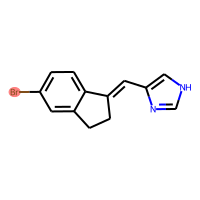
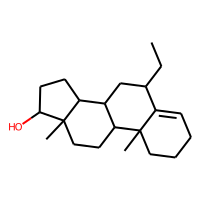
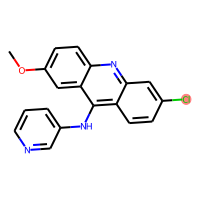
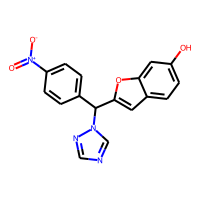
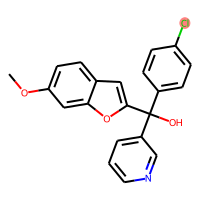
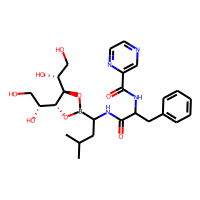
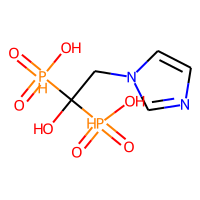
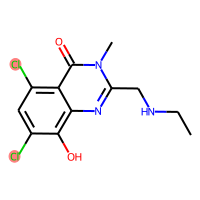
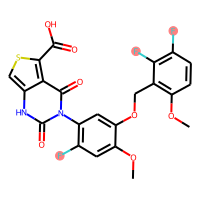
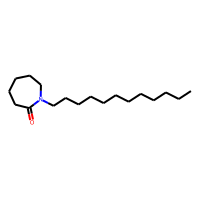

In [34]:
dataframe

In [35]:
featureList = []
for column in dataframe.columns:
    if column not in ['id', 'activity', 'preprocessedSmiles', 'label', 'Molecule', 'PUBCHEM_ACTIVITY_OUTCOME','pChEMBL Value', 'activity_classification' ]:
        featureList.append(column)

In [36]:
x = dataframe.loc[:, featureList].values
y = dataframe.loc[:, ['label']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

variance = pca.explained_variance_ratio_
principalDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

pcaDF = pd.concat([principalDF, dataframe[['label']], dataframe[['preprocessedSmiles']]], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=featureList)
print(loadings)

                   PC1       PC2
N             0.172290  0.218160
O             0.347601 -0.209790
chiral        0.243924 -0.260998
MW            0.356009  0.180328
heavy_atoms   0.360660  0.211820
h_acc         0.372491 -0.066910
h_don         0.296887 -0.202627
logP         -0.127571  0.345406
TPSA          0.374163 -0.125081
numAro        0.044994  0.512450
formalCharge -0.011586  0.032091
numRings      0.180805  0.308400
frac_csp3     0.063922 -0.383944
S             0.093123  0.054962
nHalogens    -0.048366  0.096331
MR            0.316326  0.252871


In [37]:
#plot_pca
def plot_pca(pcaDF,variance,databases,colors):
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['figure.figsize'] = 5, 5
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 ({:.2%})'.format(variance[0]), fontsize=16)
    axes.set_ylabel('PC2 ({:.2%})'.format(variance[1]), fontsize=16)

    for database, color in zip(databases, colors):
        indicesToKeep = pcaDF['label'] == database
        axes.scatter(pcaDF.loc[indicesToKeep, 'PC1'], pcaDF.loc[indicesToKeep, 'PC2'], c=color, s=5,alpha=0.8)
    axes.legend(databases, fontsize=16, loc='upper left', scatterpoints=5)

    #plt.scatter(x, y, s=50)
    plt.tick_params(labelsize=14)
    #axes.set_xlim(left=-5.2, right=30.5)

    axes.set_yticks([-5,0,5,10,15])
    axes.set_xticks([-5,0,5,10,15])
    #axes.set_ylim(bottom=-11.5, top=37)
 
    plt.tight_layout()
#     if len(set(pcaDF.db))==2:
#         plt.savefig('../../../20210901_analysis/pca.png')
    plt.show()

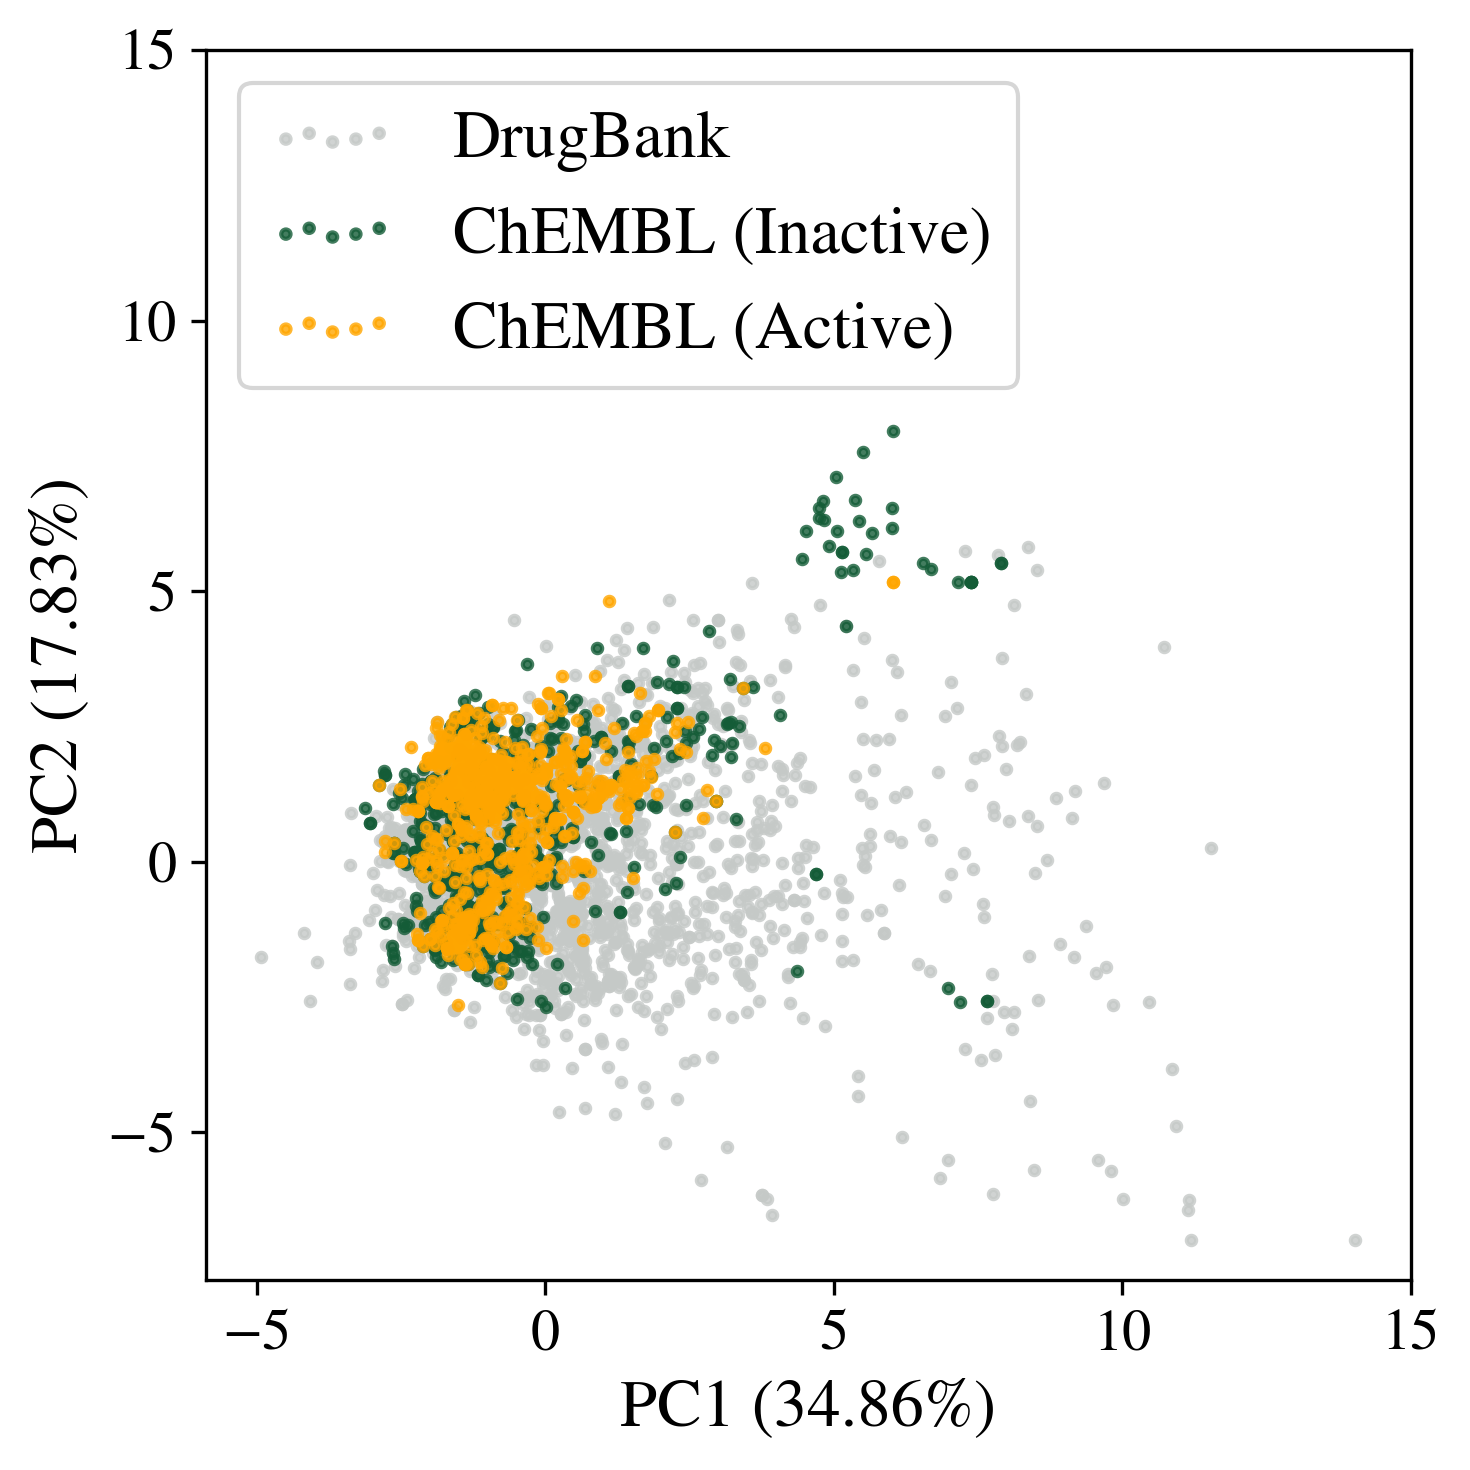

In [38]:
# Active and inactive compounds from ChEMBL, with drug bank as background
databases = ['DrugBank', 'ChEMBL (Inactive)', 'ChEMBL (Active)']#, 'PubChem BioAssay (Active)', 'PubChem BioAssay (Inactive)', 'Tested compounds']
colors = ['#c5c9c7', '#145c37', '#ffa600']#, '#800000', 'aqua', 'blue']

plot_pca(pcaDF,variance,databases,colors)

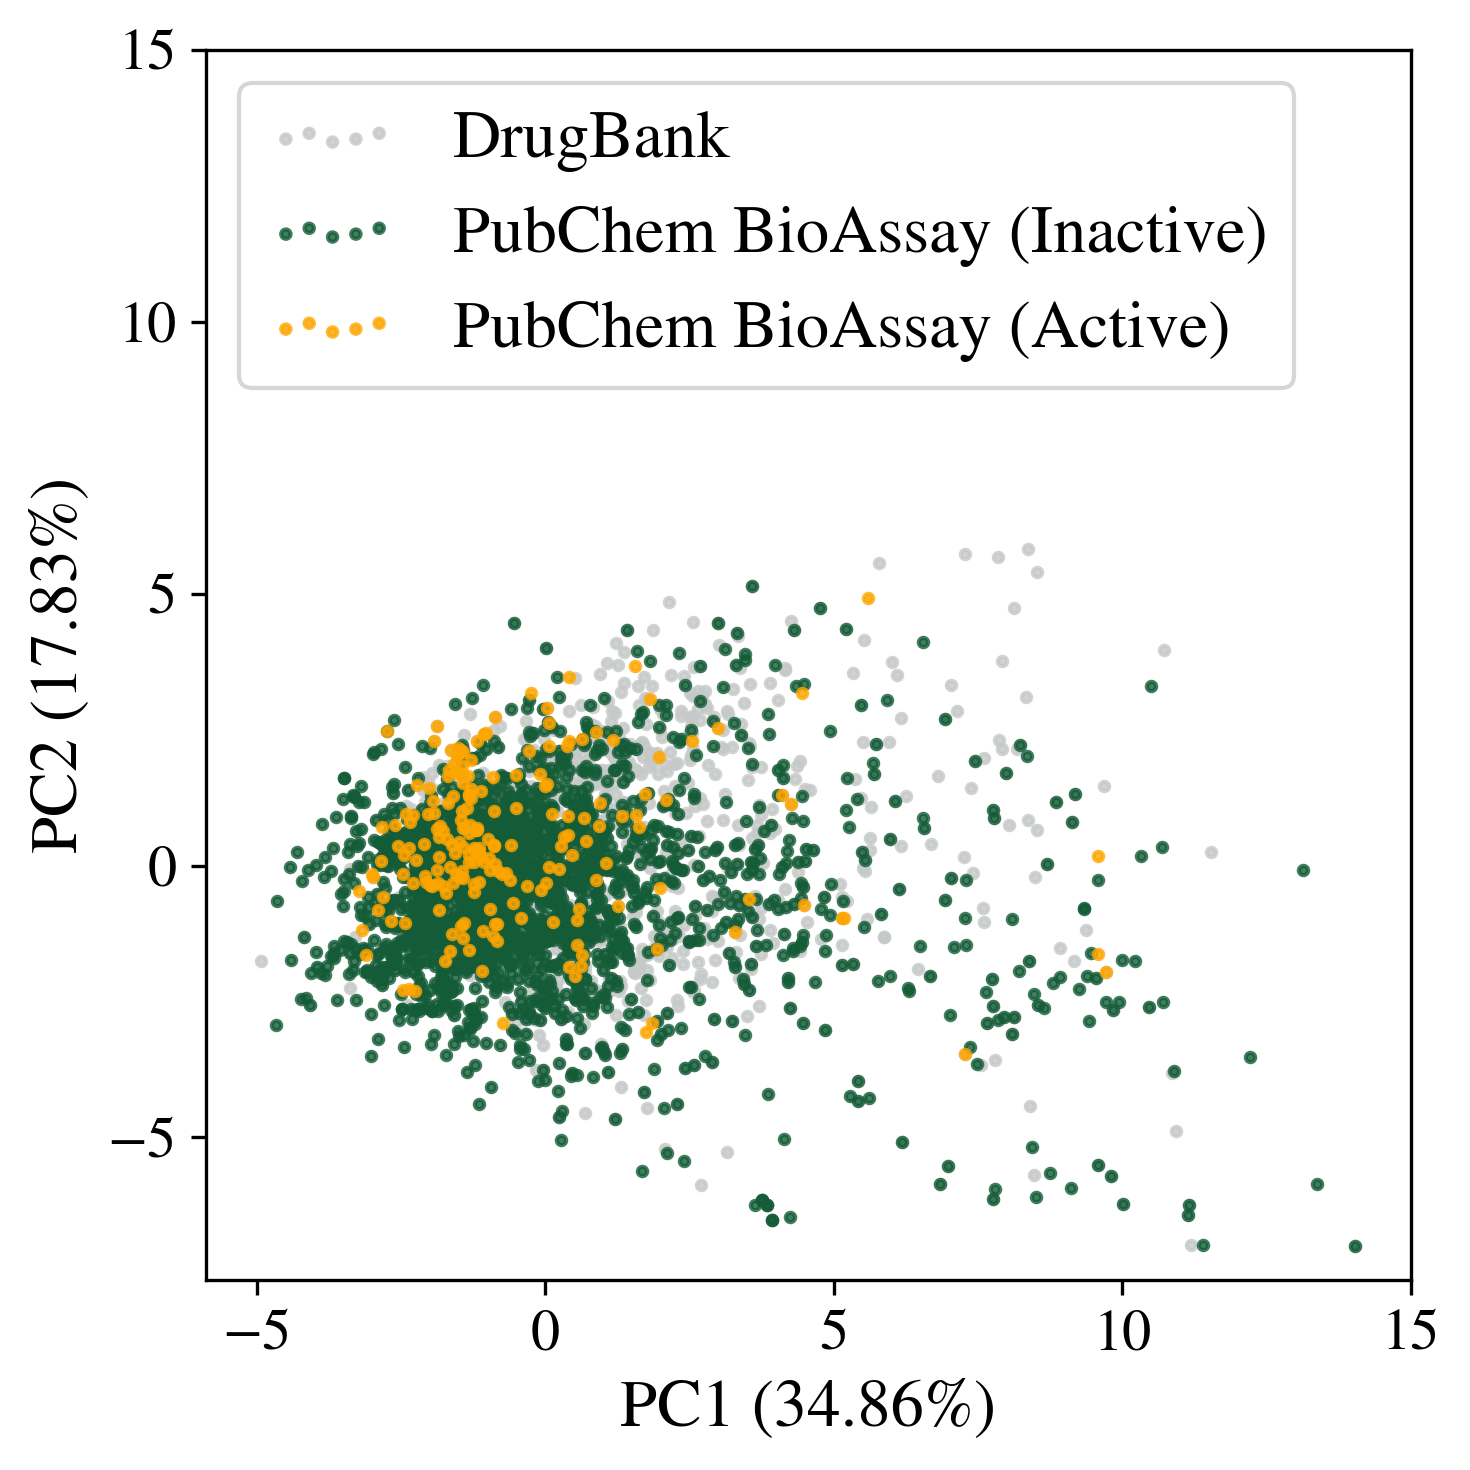

In [39]:
databases = ['DrugBank', 'PubChem BioAssay (Inactive)', 'PubChem BioAssay (Active)']#, 'DrugBank', 'Tested compounds']
colors =  ['#c5c9c7', '#145c37', '#ffa600']

plot_pca(pcaDF,variance,databases,colors)

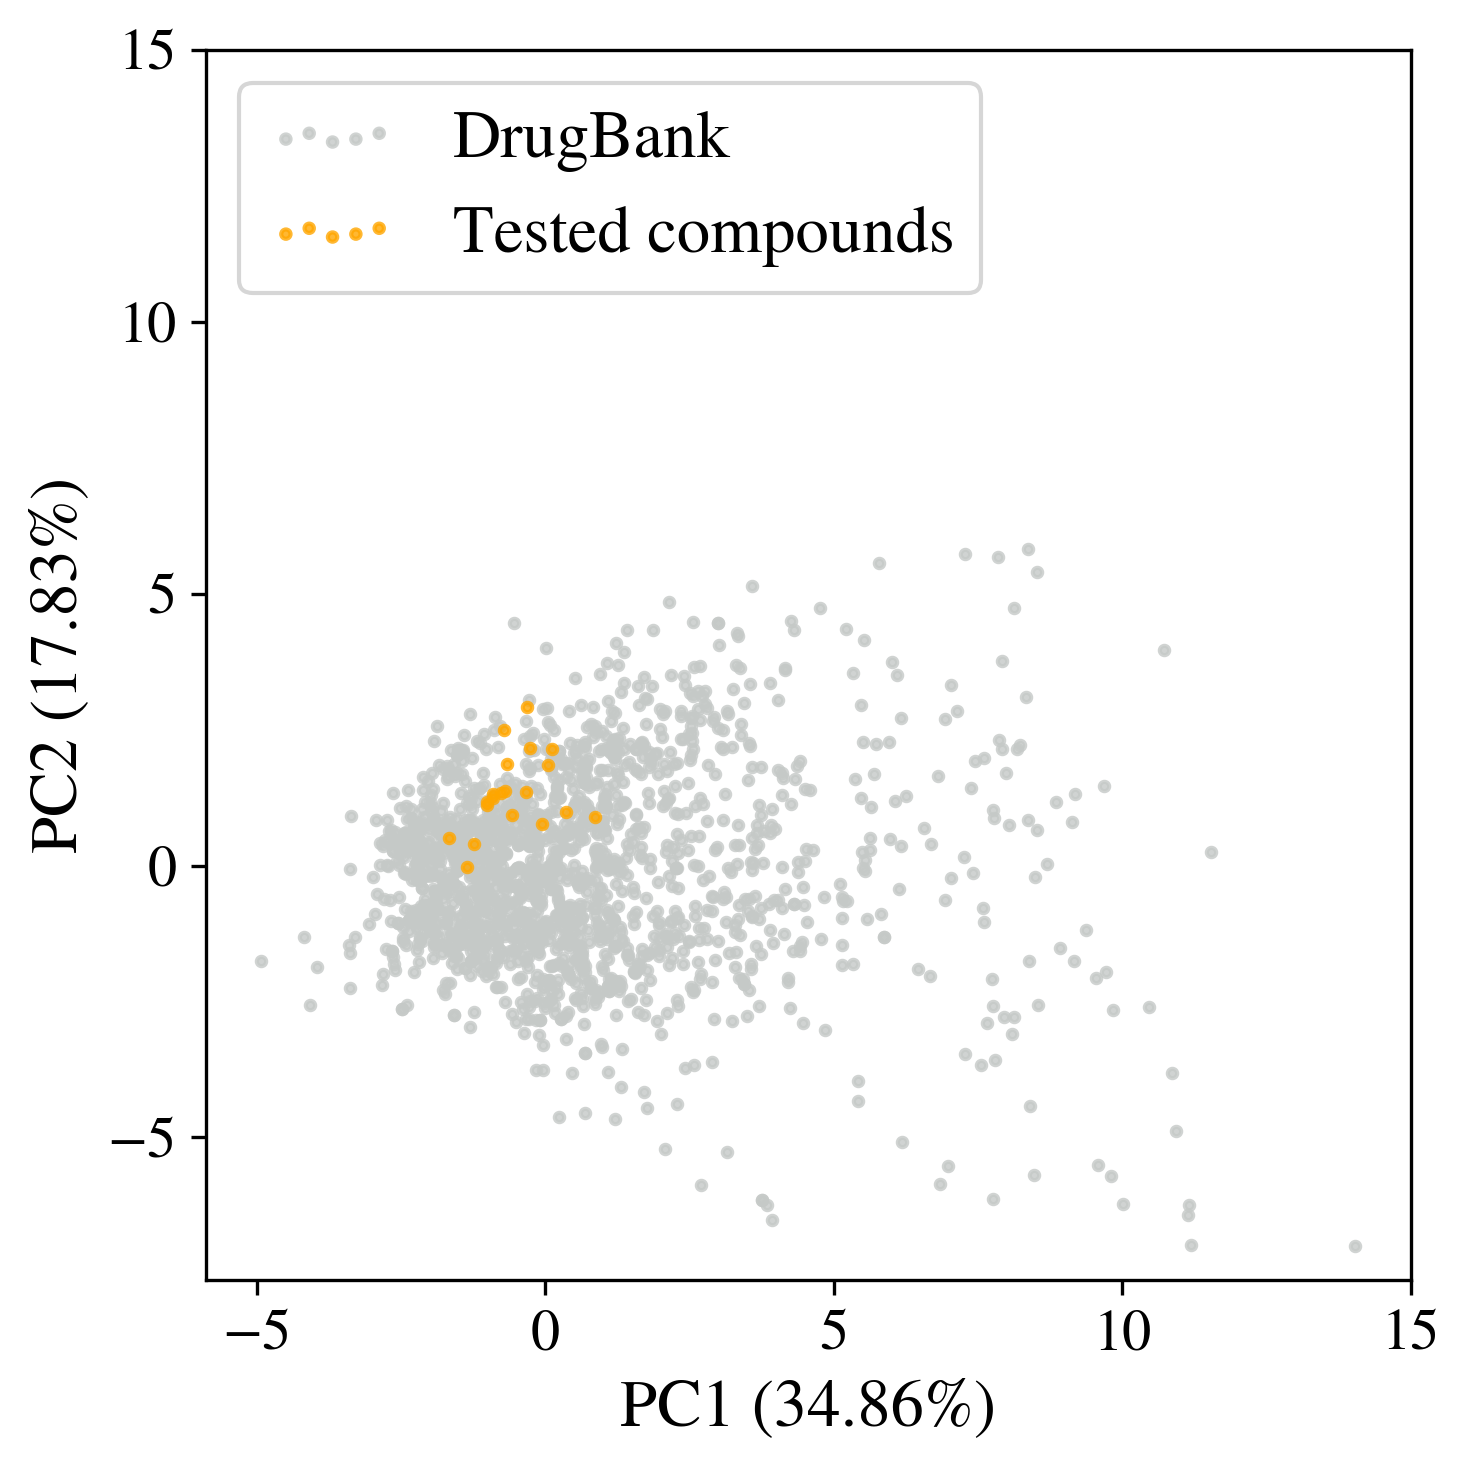

In [40]:
#tested compounds
databases = ['DrugBank', 'Tested compounds']
colors =  ['#c5c9c7', '#ffa600']

plot_pca(pcaDF,variance,databases,colors)

In [50]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt
import numpy as np


# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_active['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_active['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


[0.13580246913580246, 0.25806451612903225, 0.2857142857142857, 0.3508771929824561, 0.5306122448979592, 0.36363636363636365, 0.41818181818181815, 0.2153846153846154, 0.39622641509433965, 0.5084745762711864, 0.2571428571428571, 0.24444444444444444, 0.25675675675675674, 0.25333333333333335, 0.21052631578947367, 0.22413793103448276, 0.20833333333333334, 0.2647058823529412, 0.39622641509433965, 0.22058823529411764, 0.2631578947368421, 0.2033898305084746, 0.23170731707317074, 0.2777777777777778, 0.2857142857142857, 0.39285714285714285, 0.2916666666666667, 0.28, 0.3114754098360656, 0.3, 0.39285714285714285, 0.36, 0.21212121212121213, 0.41818181818181815, 0.5454545454545454, 0.3620689655172414, 0.29508196721311475, 0.3898305084745763, 0.19230769230769232, 0.24561403508771928, 0.5681818181818182, 0.16417910447761194, 0.39622641509433965, 0.2542372881355932, 0.2711864406779661, 0.46938775510204084, 0.3333333333333333, 0.21333333333333335, 0.26865671641791045, 0.2714285714285714, 0.33333333333333

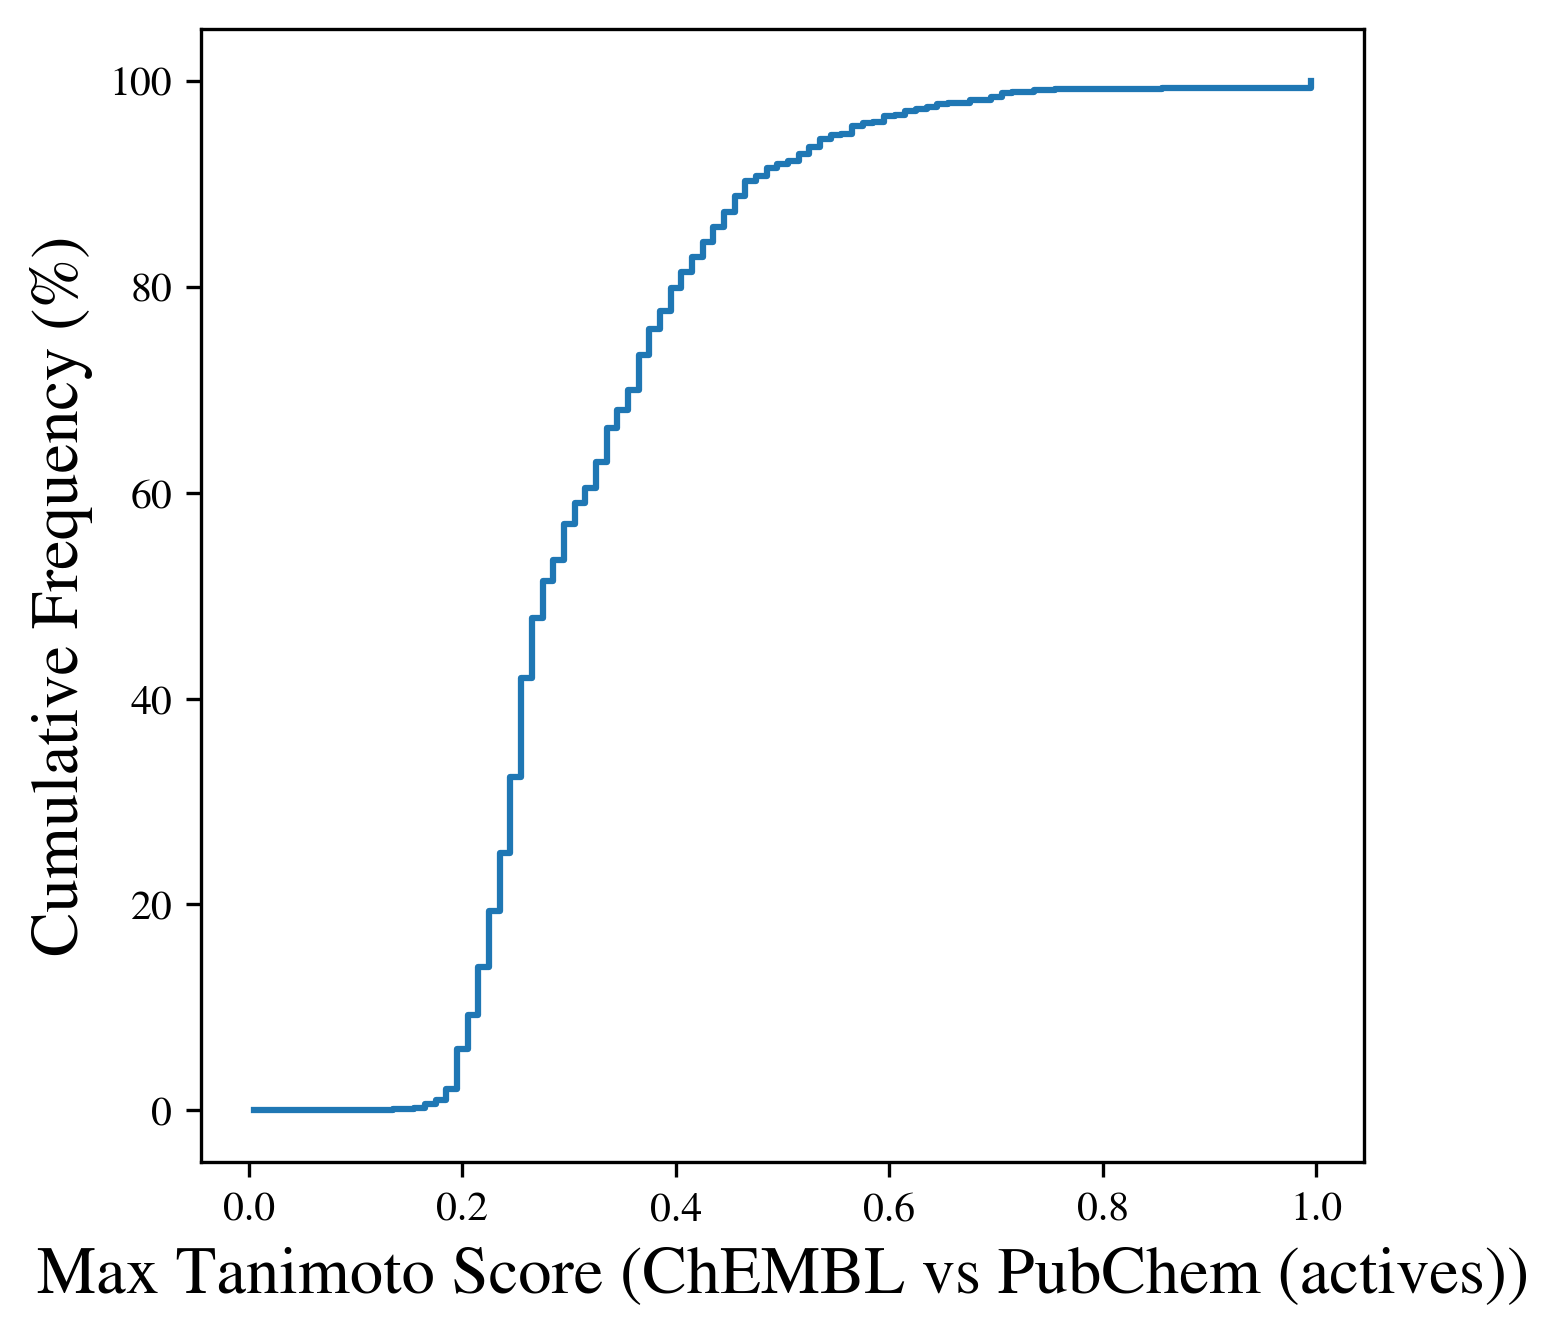

<Figure size 1500x1500 with 0 Axes>

In [52]:

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score (ChEMBL vs PubChem (actives))', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

[0.2909090909090909, 0.3064516129032258, 0.26785714285714285, 0.3188405797101449, 0.3194444444444444, 0.2830188679245283, 0.2972972972972973, 0.4727272727272727, 0.37681159420289856, 0.32941176470588235, 0.29310344827586204, 1.0, 0.2727272727272727, 0.3023255813953488, 0.3333333333333333, 0.288135593220339, 0.3, 0.4, 0.2631578947368421, 0.37349397590361444, 0.265625, 0.30158730158730157, 0.5769230769230769, 0.35, 0.5, 0.29310344827586204, 0.23529411764705882, 0.35064935064935066, 0.23333333333333334, 1.0, 0.2857142857142857, 0.3076923076923077, 0.35555555555555557, 0.34375, 0.3333333333333333, 0.27058823529411763, 0.2898550724637681, 0.3409090909090909, 0.21333333333333335, 0.28846153846153844, 0.23728813559322035, 0.37333333333333335, 0.3508771929824561, 0.23170731707317074, 0.5405405405405406, 0.2653061224489796, 0.3269230769230769, 0.375, 0.3013698630136986, 0.3111111111111111, 0.25862068965517243, 0.35, 0.21428571428571427, 0.24390243902439024, 0.24193548387096775, 0.56862745098039

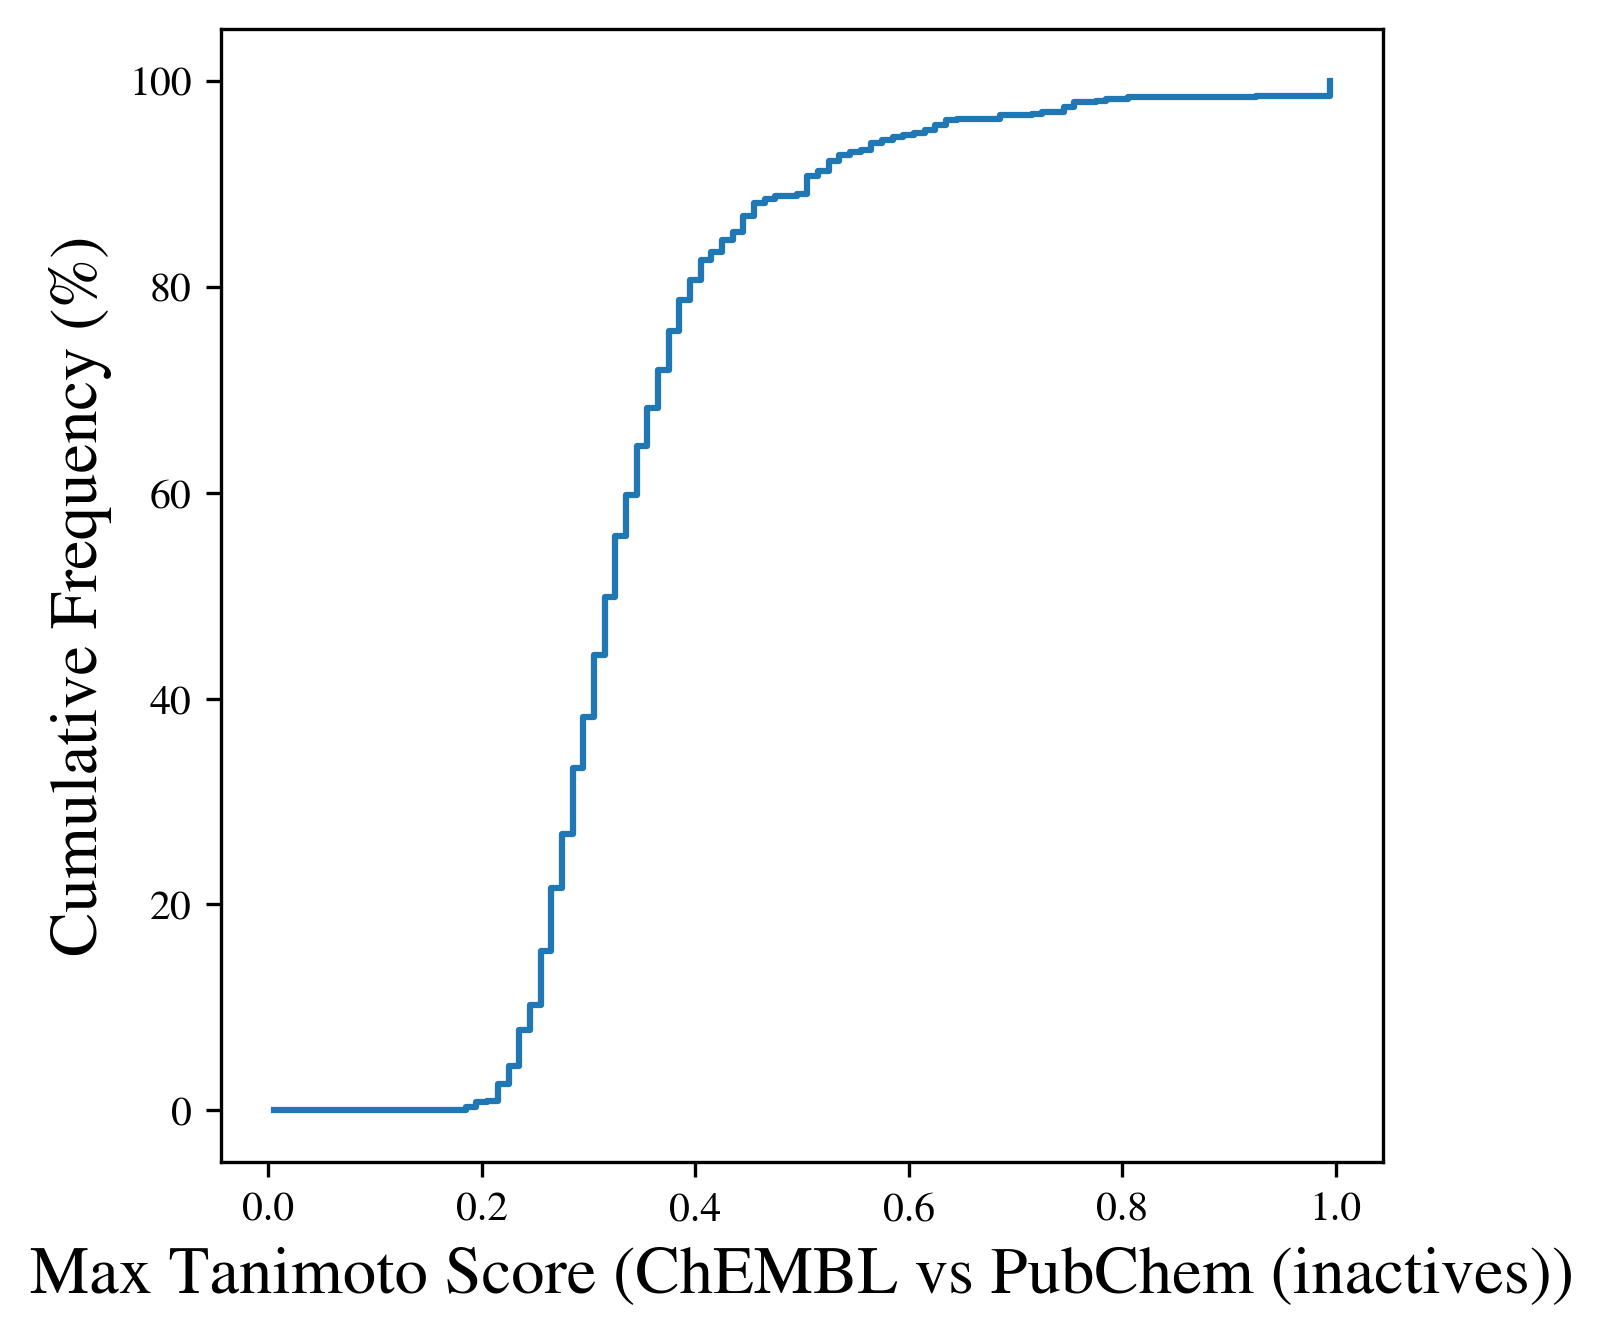

<Figure size 1500x1500 with 0 Axes>

In [55]:
# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_inactive['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_inactive['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score (ChEMBL vs PubChem (inactives))', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

[0.5454545454545454, 0.5, 0.3387096774193548, 0.7169811320754716, 0.3382352941176471, 0.39344262295081966, 0.6444444444444445, 0.725, 0.5957446808510638, 0.6428571428571429, 0.5147058823529411, 0.5652173913043478, 0.48484848484848486, 0.5901639344262295, 0.6285714285714286, 0.6388888888888888, 0.6, 0.7115384615384616, 0.32857142857142857, 0.7446808510638298, 0.5094339622641509, 0.64, 0.32, 0.2786885245901639, 0.3076923076923077, 0.3333333333333333, 0.48484848484848486, 0.5230769230769231, 0.4444444444444444, 0.45588235294117646, 0.4057971014492754, 0.43636363636363634, 0.28169014084507044, 0.6825396825396826, 0.45161290322580644, 0.75, 0.5490196078431373, 0.6326530612244898, 0.6078431372549019, 0.3220338983050847, 0.5681818181818182, 0.27692307692307694, 0.36764705882352944, 0.8125, 0.8085106382978723, 0.40384615384615385, 0.5079365079365079, 0.5396825396825397, 0.6666666666666666, 0.7592592592592593, 0.42028985507246375, 0.8461538461538461, 0.8863636363636364, 0.8823529411764706, 0.68

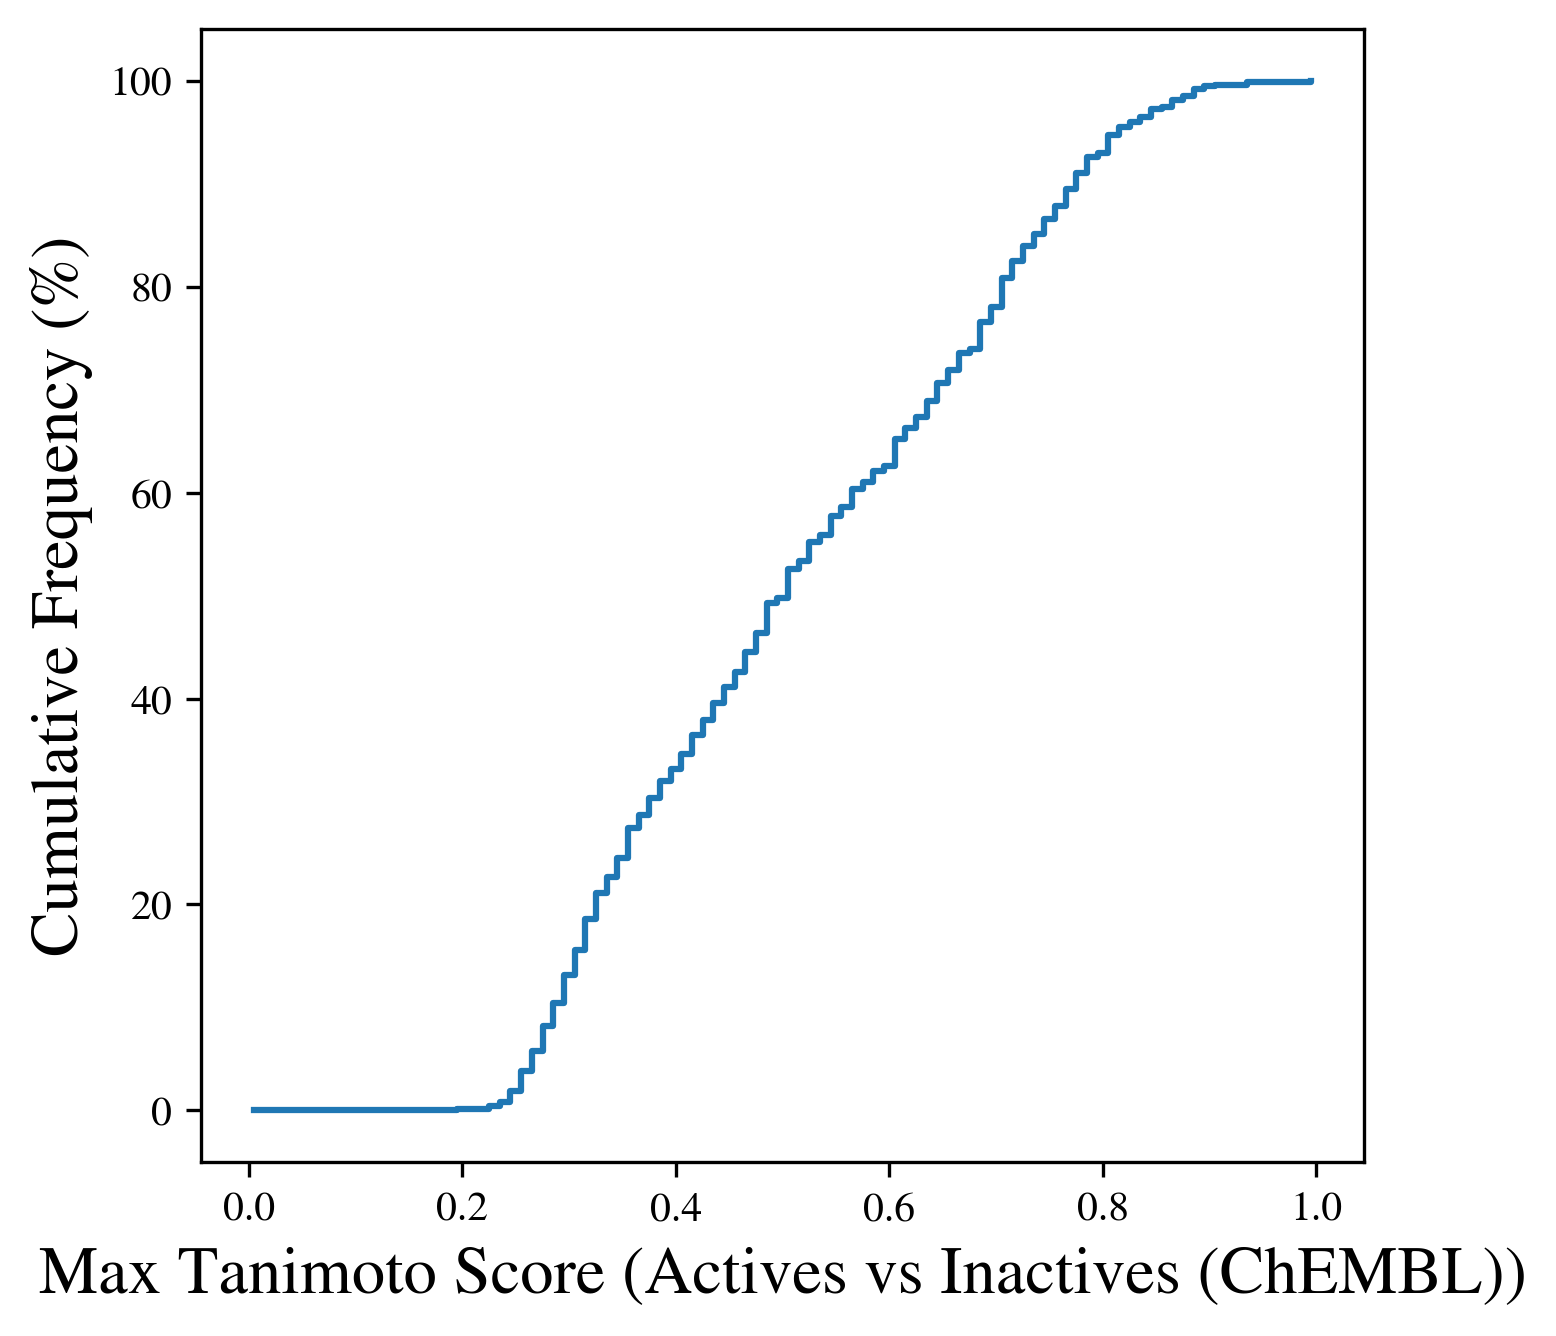

<Figure size 1500x1500 with 0 Axes>

In [56]:
# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_active['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in chembl_inactive['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score (Actives vs Inactives (ChEMBL))', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

[0.6530612244897959, 0.23529411764705882, 0.5692307692307692, 0.3333333333333333, 0.21052631578947367, 0.559322033898305, 0.6181818181818182, 0.46875, 0.36538461538461536, 0.3783783783783784, 0.27906976744186046, 0.2727272727272727, 0.265625, 0.2903225806451613, 0.24489795918367346, 0.28846153846153844, 0.4838709677419355, 0.425, 0.7647058823529411, 0.8, 0.22535211267605634, 0.3, 0.29411764705882354, 0.2553191489361702, 0.4603174603174603, 0.41304347826086957, 0.35526315789473684, 0.24691358024691357, 0.37735849056603776, 0.27472527472527475, 0.4666666666666667, 0.7704918032786885, 0.5, 0.225, 0.46153846153846156, 0.42592592592592593, 0.2391304347826087, 0.26666666666666666, 0.5689655172413793, 0.2840909090909091, 0.19387755102040816, 0.3709677419354839, 0.40540540540540543, 0.4810126582278481, 0.26373626373626374, 0.42105263157894735, 0.5135135135135135, 0.30357142857142855, 0.42857142857142855, 0.3958333333333333, 0.27941176470588236, 0.37037037037037035, 0.5166666666666667, 0.230769

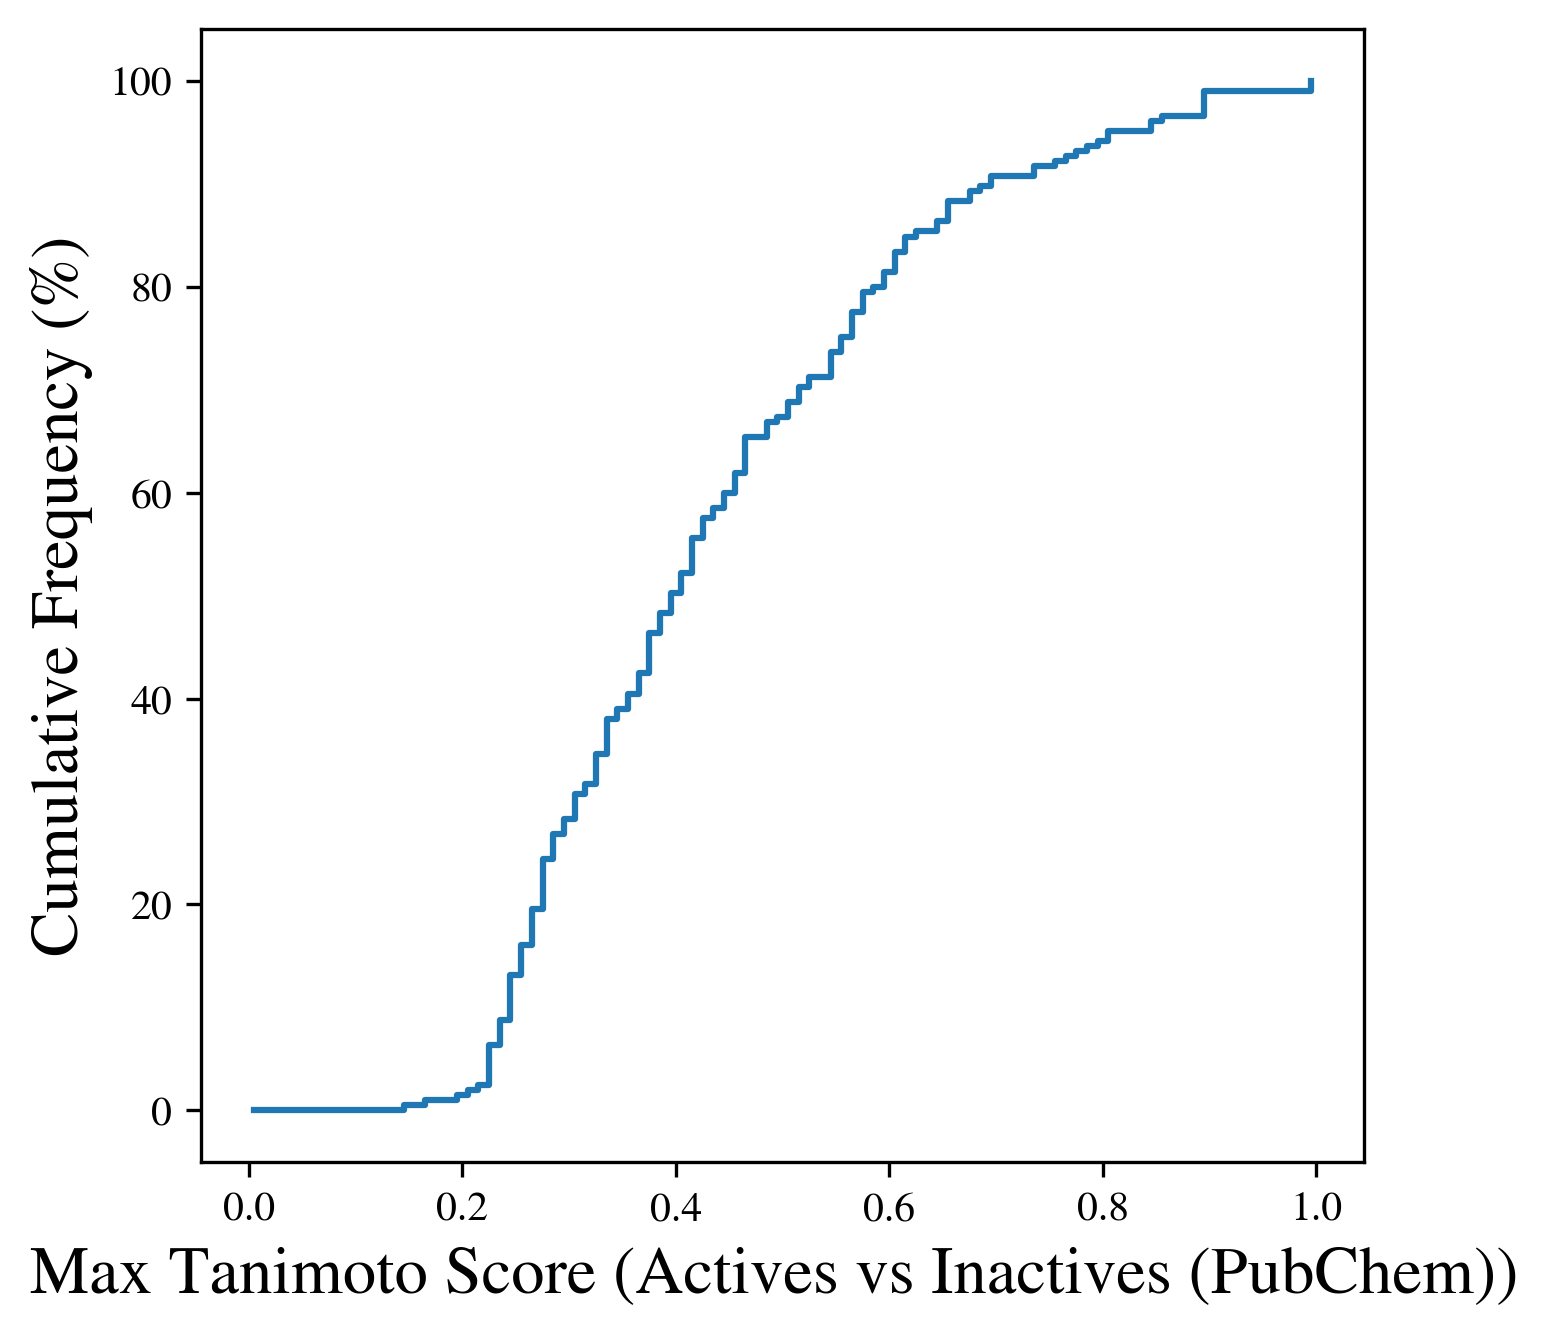

<Figure size 1500x1500 with 0 Axes>

In [57]:
# load dataset A and calculate Morgan fingerprints
#datasetA = [...]  # list of SMILES strings
molA = [Chem.MolFromSmiles(smiles) for smiles in pubchem_active['preprocessedSmiles']]
fpsA = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molA]

# load dataset B and calculate Morgan fingerprints
#datasetB = [...]  # list of SMILES strings
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_inactive['preprocessedSmiles']]
fpsB = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in molB]

# calculate Tanimoto similarity for each pair of compounds
max_scores = []
for fpA in fpsA:
    max_score = 0
    for fpB in fpsB:
        score = TanimotoSimilarity(fpA, fpB)
        if score > max_score:
            max_score = score
    max_scores.append(max_score)

# print the list of max scores
print(max_scores)
print(len(max_scores))

# calculate cumulative histogram of max scores
counts, bin_edges = np.histogram(max_scores, bins=100, range=(0, 1), density=True)
cumulative = np.cumsum(counts)
total = cumulative[-1]
cumulative_percentage = cumulative/ total * 100  # Multiply by 100 to convert to percentage
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# plot the histogram
fig = plt.figure(dpi=300)
plt.plot(bin_centers, cumulative, drawstyle='steps-post')
plt.xlabel('Max Tanimoto Score (Actives vs Inactives (PubChem)) ', fontsize=16)
plt.ylabel('Cumulative Frequency (%)', fontsize=16)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = 5, 5
#plt.title('Distribution of Max Tanimoto Scores', fontsize=14)
plt.figure(dpi=300)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.show()

In [45]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Descriptors, Draw, rdMolDescriptors
from collections import Counter
import matplotlib.pyplot as plt


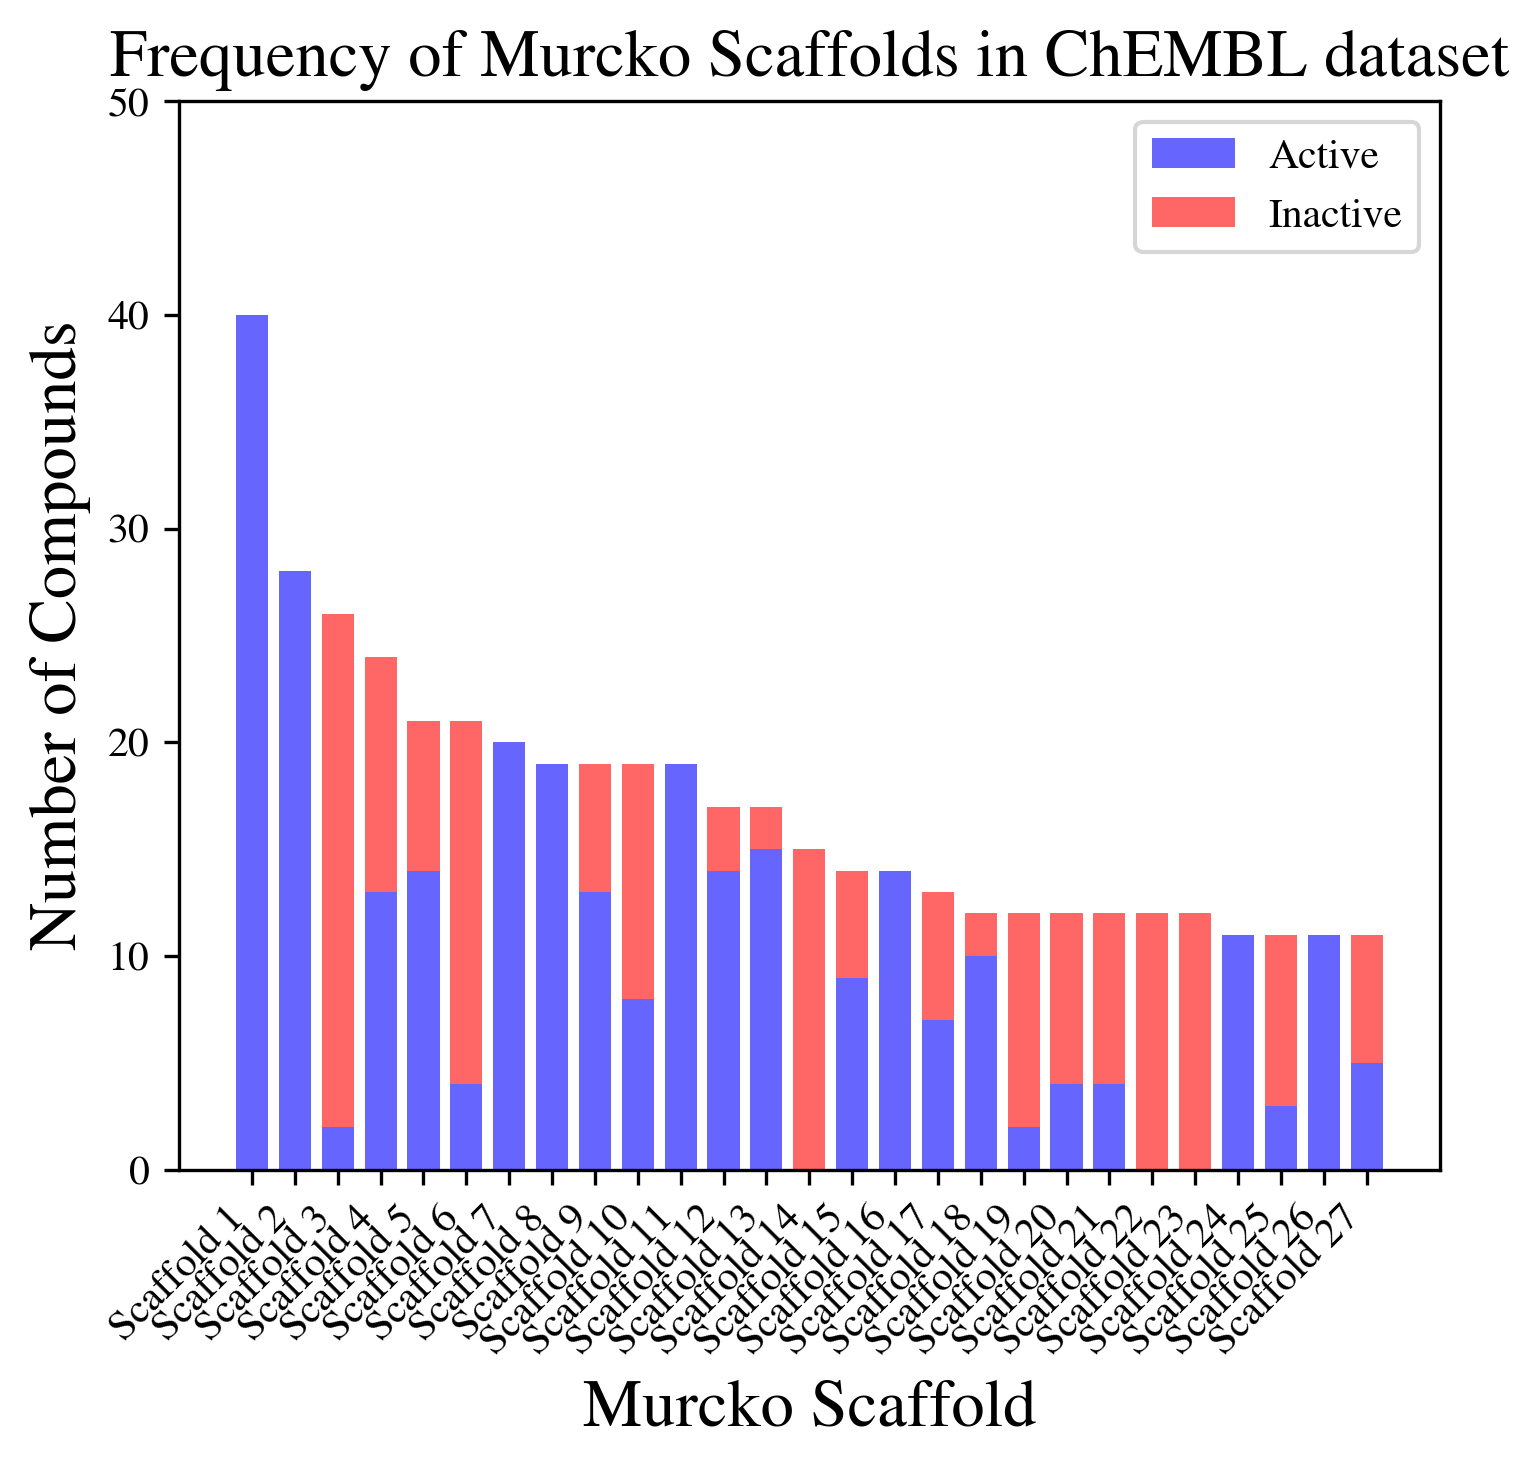

In [60]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate Murcko scaffolds and counts
def generate_scaffolds_and_counts(mols):
    scaffolds_rdkitobject = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
    scaffolds = [Chem.MolToSmiles(m) for m in scaffolds_rdkitobject if m is not None]
    return Counter(scaffolds)

# Generate Murcko scaffolds and counts for active and inactive compounds
molA = [Chem.MolFromSmiles(smiles) for smiles in chembl_active['preprocessedSmiles']]
molB = [Chem.MolFromSmiles(smiles) for smiles in chembl_inactive['preprocessedSmiles']]
active_scaffold_counts = generate_scaffolds_and_counts(molA)
inactive_scaffold_counts = generate_scaffolds_and_counts(molB)

# Combine and filter scaffold counts
combined_scaffold_counts = active_scaffold_counts + inactive_scaffold_counts
filtered_scaffold_counts = {scaffold: count for scaffold, count in combined_scaffold_counts.items() if count > 10}

# Sort scaffolds based on total occurrence
sorted_scaffolds = dict(sorted(filtered_scaffold_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
scaffolds = list(sorted_scaffolds.keys())
active_counts = [active_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]
inactive_counts = [inactive_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]

# Plotting

plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(5, 5), dpi=300)
bar_width = 0.75
index = range(len(scaffolds))

# Create stacked bars
plt.bar(index, active_counts, bar_width, label='Active', color='b', alpha=0.6)
plt.bar(index, inactive_counts, bar_width, bottom=active_counts, label='Inactive', color='r', alpha=0.6)
plt.ylim((0, 50))
plt.xlabel('Murcko Scaffold', fontsize=16)
plt.ylabel('Number of Compounds', fontsize=16)
plt.title('Frequency of Murcko Scaffolds in ChEMBL dataset', fontsize=16)
plt.xticks(index, [f'Scaffold {i+1}' for i in range(len(scaffolds))], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()



In [61]:

# Create a DataFrame for scaffolds with their active and inactive counts
scaffolds_data = {
    'Scaffold': list(filtered_scaffold_counts.keys()),
    'Active_Count': [active_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Inactive_Count': [inactive_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Total_Occurrence': [count for count in filtered_scaffold_counts.values()]
}
scaffolds_df = pd.DataFrame(scaffolds_data)

# Filter and sort DataFrame for visualization
scaffolds_df = scaffolds_df[scaffolds_df['Total_Occurrence'] > 10].sort_values(by='Total_Occurrence', ascending=False)

# Generate plot labels and assign them as a new column in the DataFrame
plot_labels = [f'Scaffold {i+1}' for i in range(len(scaffolds))]
scaffolds_df['Plot_Index'] = plot_labels
scaffolds_df.to_csv ('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/scaffolds_df_chembl.csv', index = False, header=True)
# Print the DataFrame of scaffolds to be plotted
scaffolds_df

,Scaffold,Active_Count,Inactive_Count,Total_Occurrence,Plot_Index
6,c1ccc(CN(c2ccccc2)n2cnnc2)cc1,40,0,40,Scaffold 1
7,c1ccc(-c2cccc(Cn3cncn3)c2)cc1,28,0,28,Scaffold 2
18,O=S(=O)(NCCc1c(C(c2ccccc2)c2[nH]c3ccccc3c2CCNS...,2,24,26,Scaffold 3
13,C(=C(c1ccccc1)c1ccccc1)c1ccccc1,13,11,24,Scaffold 4
2,O=C1CCC2C1CCC1C3CCCC=C3CCC21,14,7,21,Scaffold 5
17,O=C1CC(c2ccccc2)Oc2ccccc21,4,17,21,Scaffold 6
10,O=S(=O)(c1ccccc1)N1CCCC(Cn2ccnc2)C1,20,0,20,Scaffold 7
5,O=c1cc(Cn2ccnc2)c2ccc(OCc3ccccc3)cc2o1,19,0,19,Scaffold 8
8,O=C1CCC2C(=CCC3C4CCC(=O)C4CCC23)C1,13,6,19,Scaffold 9
22,c1ccc(-n2c(Cn3ccnc3)cc3ccccc32)cc1,19,0,19,Scaffold 10


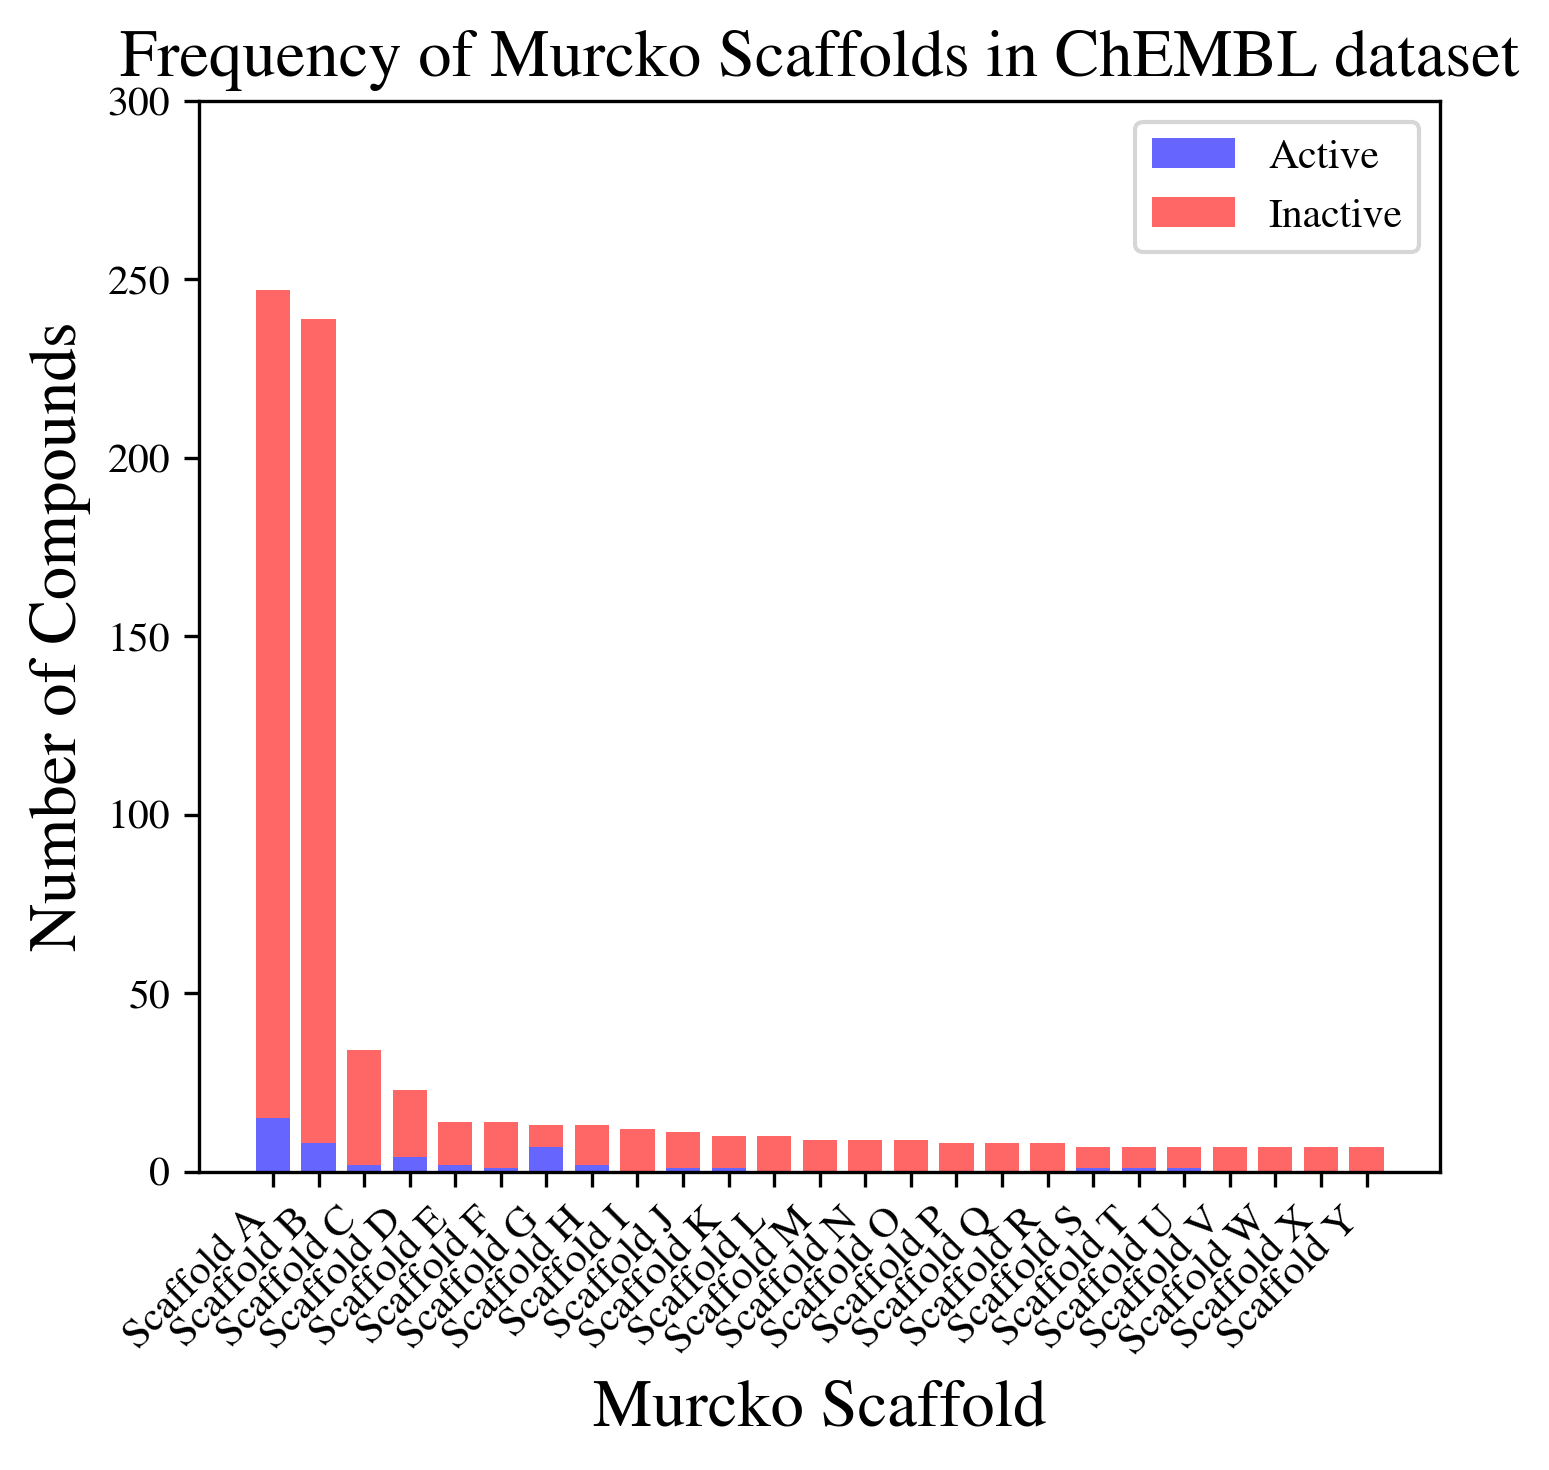

In [23]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate Murcko scaffolds and counts
def generate_scaffolds_and_counts(mols):
    scaffolds_rdkitobject = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
    scaffolds = [Chem.MolToSmiles(m) for m in scaffolds_rdkitobject if m is not None]
    return Counter(scaffolds)

# Generate Murcko scaffolds and counts for active and inactive compounds
molA = [Chem.MolFromSmiles(smiles) for smiles in pubchem_active['preprocessedSmiles']]
molB = [Chem.MolFromSmiles(smiles) for smiles in pubchem_inactive['preprocessedSmiles']]
active_scaffold_counts = generate_scaffolds_and_counts(molA)
inactive_scaffold_counts = generate_scaffolds_and_counts(molB)

# Combine and filter scaffold counts
combined_scaffold_counts = active_scaffold_counts + inactive_scaffold_counts
filtered_scaffold_counts = {scaffold: count for scaffold, count in combined_scaffold_counts.items() if count > 6}

# Sort scaffolds based on total occurrence
sorted_scaffolds = dict(sorted(filtered_scaffold_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
scaffolds = list(sorted_scaffolds.keys())
active_counts = [active_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]
inactive_counts = [inactive_scaffold_counts.get(scaffold, 0) for scaffold in scaffolds]

# Plotting

plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(figsize=(5, 5), dpi=300)
bar_width = 0.75
index = range(len(scaffolds))

import string

if len(scaffolds) <= 26:
    labels = ['Scaffold ' + letter for letter in string.ascii_uppercase[:len(scaffolds)]]
else:
    # Extend beyond 'Z' if necessary
    labels = ['Scaffold ' + string.ascii_uppercase[i % 26] + str(i // 26 + 1) for i in range(len(scaffolds))]



# Create stacked bars
plt.bar(index, active_counts, bar_width, label='Active', color='b', alpha=0.6)
plt.bar(index, inactive_counts, bar_width, bottom=active_counts, label='Inactive', color='r', alpha=0.6)
plt.ylim((0, 300))
plt.xlabel('Murcko Scaffold', fontsize=16)
plt.ylabel('Number of Compounds', fontsize=16)
plt.title('Frequency of Murcko Scaffolds in ChEMBL dataset', fontsize=16)
plt.xticks(index, labels, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# Function to generate Murcko scaffolds, counts, and molecule mappings
def generate_scaffolds_counts_and_mappings(mols):
    scaffold_to_molecules = defaultdict(list)
    scaffolds_rdkitobject = [(MurckoScaffold.GetScaffoldForMol(mol), mol) for mol in mols]
    
    for scaffold_rdkit, original_mol in scaffolds_rdkitobject:
        if scaffold_rdkit is not None:
            scaffold_smiles = Chem.MolToSmiles(scaffold_rdkit)
            original_smiles = Chem.MolToSmiles(original_mol)
            scaffold_to_molecules[scaffold_smiles].append(original_smiles)
    
    scaffolds = [Chem.MolToSmiles(m) for m, _ in scaffolds_rdkitobject if m is not None]
    return Counter(scaffolds), scaffold_to_molecules

# Adjusted for generating mappings
active_scaffold_counts, active_scaffold_to_molecules = generate_scaffolds_counts_and_mappings(molA)
inactive_scaffold_counts, inactive_scaffold_to_molecules = generate_scaffolds_counts_and_mappings(molB)

# Function to retrieve molecules for a specific scaffold
def get_molecules_for_scaffold(scaffold, active_mapping, inactive_mapping):
    active_molecules = active_mapping.get(scaffold, [])
    inactive_molecules = inactive_mapping.get(scaffold, [])
    return active_molecules, inactive_molecules

# Example usage for scaffold "B"
# Assuming 'Scaffold B' corresponds to a specific SMILES string in your 'labels' list
scaffold_b_smiles = ''  # You need to replace this with the actual SMILES
active_molecules_b, inactive_molecules_b = get_molecules_for_scaffold(scaffold_b_smiles, active_scaffold_to_molecules, inactive_scaffold_to_molecules)

print("Active molecules for Scaffold B:", active_molecules_b)
print("Inactive molecules for Scaffold B:", inactive_molecules_b)


Active molecules for Scaffold B: ['CCCCCCCC[P+](CCCCCCCC)(CCCCCCCC)CCCCCCCC', 'CC(C)N(C(=O)SCC(Cl)=CCl)C(C)C', 'CCCCCCCC[N+](CCCCCCCC)(CCCCCCCC)CCCCCCCC', 'O=P(OC(CCl)CCl)(OC(CCl)CCl)OC(CCl)CCl', 'CCOP(=S)(OCC)OC(Cl)C(Cl)(Cl)Cl', 'CCCCC(CC)C(=O)OCCOCCOCCOCCOC(=O)C(CC)CCCC', 'C=C(C)C(=O)OCCCCCCOC(=O)C(=C)C', 'CCCCCCCCCCCCCCCC[N+](C)(C)CC']
Inactive molecules for Scaffold B: ['CCCCCC=CCC=CCC=CCC=CCCCC(=O)NCC(=O)O', 'CCCC(C)(COC(N)=O)COC(=O)NC(C)C', 'O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CCN(CC(=O)O)CC(=O)O', 'O=C(O)CN(CCOCCOCCN(CC(=O)O)CC(=O)O)CC(=O)O', 'CCCCCCCCCCCCCCCC(=O)NCCO', 'CC(=O)NC(CC(=O)NC(CCC(=O)O)C(=O)O)C(=O)O', 'CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCN', 'COP(=O)(OC)C(O)C(Cl)(Cl)Cl', 'COC(C)(C)CCCC(C)C=CC=C(C)CC(=O)OC(C)C', 'BrCCCBr.CN(C)CCCCCCN(C)C', 'CCCCCC=CCC=CCCCCCCCC(=O)O', 'CCC=CCC=CCC=CCCCCCCCC(=O)O', 'OC(CBr)C(O)C(O)C(O)CBr', 'CCCCCCCCC=CCCCCCCCC(=O)O', 'CCCCCCCC(=O)OCC(COC(=O)CCCCCCC)OC(=O)CCCCCCC', 'IC(I)I', 'CCCCCCCCCCCCCCCCCC(=O)O', 'CCOC(=O)CC(SP(=S)

In [63]:
# Create a DataFrame for scaffolds with their active and inactive counts
scaffolds_data = {
    'Scaffold': list(filtered_scaffold_counts.keys()),
    'Active_Count': [active_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Inactive_Count': [inactive_scaffold_counts.get(scaffold, 0) for scaffold in filtered_scaffold_counts.keys()],
    'Total_Occurrence': [count for count in filtered_scaffold_counts.values()]
}
scaffolds_df = pd.DataFrame(scaffolds_data)

# Filter and sort DataFrame for visualization
scaffolds_df = scaffolds_df[scaffolds_df['Total_Occurrence'] > 6].sort_values(by='Total_Occurrence', ascending=False)

# Generate plot labels and assign them as a new column in the DataFrame
plot_labels = [f'Scaffold {letter}' for letter in string.ascii_uppercase[:len(scaffolds_df)]]
scaffolds_df['Plot_Index'] = plot_labels

# Print and save the DataFrame of scaffolds to be plotted
scaffolds_df
scaffolds_df.to_csv ('/home/sliu/cyp_related_coding/RF_CYP19/chemical_space_compare/PCA_set/scaffolds_df_pubchem.csv', index = False, header=True)